In [1]:
# Use the edgelist CSV formatted file to build graphs for visualization (Networkx, matplotlib) 
import os
import pandas as pd
import numpy as np
import csv

import networkx as nx

# matplotlib graphs will be included in notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."

def save_fig(filename, tight_layout=True):
    data_path = os.path.join(PROJECT_ROOT_DIR, "images")    
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    
    fullpath_filename = os.path.join(data_path, filename + ".png")
    print("Saving image : ", fullpath_filename)
    
    if tight_layout:
        plt.tight_layout()
        
    plt.savefig(fullpath_filename, format='png', dpi=300)

In [2]:
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})

In [3]:
df = pd.read_csv('./datasets/BhowmickSouravS_noTags.csv')
df

,Author,Venue
0,Sourav S. Bhowmick,NoBt
1,Renchi Yang,NoBt
2,Jieming Shi,NoBt
3,Xiaokui Xiao,NoBt
4,Yin Yang,NoBt
5,Sourav S. Bhowmick,NoBt
6,Meng Wang 0015,NoBt
7,Hui Li 0005,NoBt
8,Jiangtao Cui,NoBt
9,Sourav S. Bhowmick,NoBt


In [4]:
authors = list(df.Author.unique())
print("Total no. of unique authors :", len(authors))

authors

Total no. of unique authors : 175


['Sourav S. Bhowmick',
 'Renchi Yang',
 'Jieming Shi',
 'Xiaokui Xiao',
 'Yin Yang',
 'Meng Wang 0015',
 'Hui Li 0005',
 'Jiangtao Cui',
 'Ping Liu',
 'Yijun Duan',
 'Adam Jatowt',
 'Masatoshi Yoshikawa',
 'Jin Yao Chin',
 'Xi Lin',
 'Yequan Wang',
 'Zengxiang Li',
 'Ricardo Campos 0001',
 'Antoine Doucet',
 'Chaohui Wang',
 'Miao Xie',
 'Byron Choi',
 'Shuigeng Zhou',
 'Nathan Ng',
 'Peipei Yi',
 'Zhiwei Zhang',
 'Jianliang Xu',
 'Christina Lui',
 'Kai Huang',
 'Huey Eng Chua',
 'Zhewei Wei',
 'Jun Zhao',
 'Rong Hua Li',
 'Siyuan Liu',
 'Wanlu Zhang',
 'Shu Wang',
 'Wanyi Huang',
 'Shafiq R. Joty',
 'Yating Zhang',
 'Yuji Matsumoto 0001',
 'Mengting Xu',
 'Changsheng Sun',
 'Zhongyuan Jiang',
 'Chengkai Li',
 'Jie Zheng',
 'Hao Su',
 'Gao Cong',
 'Wook Shin Han',
 'Nina Tahmasebi',
 'Kaiyu Feng',
 'Tao Guo',
 'Shuai Ma 0001',
 'Boon Siew Seah',
 'Aixin Sun',
 'Min Min Chew',
 'Yinglong Song',
 'Siyuan Wu',
 'Leong Hou U',
 'Wolfgang Gatterbauer',
 'Arijit Khan',
 'Francesco Bonchi',
 

In [5]:
venues = sorted(list(df.Venue.unique()))
print("Total no. of unique venues (incl. NoBt) :", len(venues))

venues

Total no. of unique venues (incl. NoBt) : 56


['ACL (1)',
 'ACM Multimedia',
 'ADL',
 'APWeb',
 'BCB',
 'BigComp',
 'CIDR',
 'CIKM',
 'CoopIS/DOA/ODBASE',
 'CoopIS/DOA/ODBASE (2)',
 'DASFAA',
 'DASFAA (1)',
 'DASFAA (2)',
 'DEXA',
 'DEXA (1)',
 'DEXA Workshops',
 'DOLAP',
 'DaWaK',
 'EC-Web',
 'EDBT',
 'ER',
 'ER (Workshops)',
 'ER Workshops',
 'Encyclopedia of Big Data Technologies',
 'FODO',
 'FQAS',
 'Foundations and Novel Approaches in Data Mining',
 'GRADES/NDA@SIGMOD/PODS',
 'Human Interaction with Graphs',
 'ICDCS',
 'ICDE',
 'ICDE Workshops',
 'ICDM Workshops',
 'ICMR',
 'ICPADS',
 'ICSC',
 'IDEAS',
 'IHI',
 'KDD',
 'Kyoto International Conference on Digital Libraries',
 'MMDB',
 'Mobile Data Management',
 'NoBt',
 'OTM Conferences (1)',
 'PAKDD',
 'PKDD',
 'Pacific Symposium on Biocomputing',
 'SIGIR',
 'SIGMOD Conference',
 'Social Media Modeling and Computing',
 'VLDB',
 'WISE Workshops',
 'WSDM',
 'WSM@MM',
 'WWW',
 'WWW (Companion Volume)']

In [6]:
# Tier 1 : VLDB, KDD
# Tier 2 : EDBT, ICDE, ICDM, SDM, CIKM
# Tier 3 : DASFAA, PAKDD, PKDD, DEXA
def intersection(list1, list2): 
    return list(set(list1) & set(list2))

tier_venues = ['VLDB', 'KDD', 'EDBT', 'ICDE', 'ICDM', 'SDM', 'CIKM', 'DASFAA', 'PAKDD', 'PKDD', 'DEXA']

Popular venues : ['ACL (1)', 'ACM Multimedia', 'ADL', 'APWeb', 'BCB', 'BigComp', 'CIDR', 'CIKM', 'CoopIS/DOA/ODBASE', 'CoopIS/DOA/ODBASE (2)', 'DASFAA', 'DASFAA (1)', 'DASFAA (2)', 'DEXA', 'DEXA (1)', 'DEXA Workshops', 'DOLAP', 'DaWaK', 'EC-Web', 'EDBT', 'ER', 'ER (Workshops)', 'ER Workshops', 'Encyclopedia of Big Data Technologies', 'FODO', 'FQAS', 'Foundations and Novel Approaches in Data Mining', 'GRADES/NDA@SIGMOD/PODS', 'Human Interaction with Graphs', 'ICDCS', 'ICDE', 'ICDE Workshops', 'ICDM Workshops', 'ICMR', 'ICPADS', 'ICSC', 'IDEAS', 'IHI', 'KDD', 'Kyoto International Conference on Digital Libraries', 'MMDB', 'Mobile Data Management', 'NoBt', 'OTM Conferences (1)', 'PAKDD', 'PKDD', 'Pacific Symposium on Biocomputing', 'SIGIR', 'SIGMOD Conference', 'Social Media Modeling and Computing', 'VLDB', 'WISE Workshops', 'WSDM', 'WSM@MM', 'WWW', 'WWW (Companion Volume)']
Sorted Tier venues : ['CIKM', 'DASFAA', 'DEXA', 'EDBT', 'ICDE', 'ICDM', 'KDD', 'PAKDD', 'PKDD', 'SDM', 'VLDB']
Inter

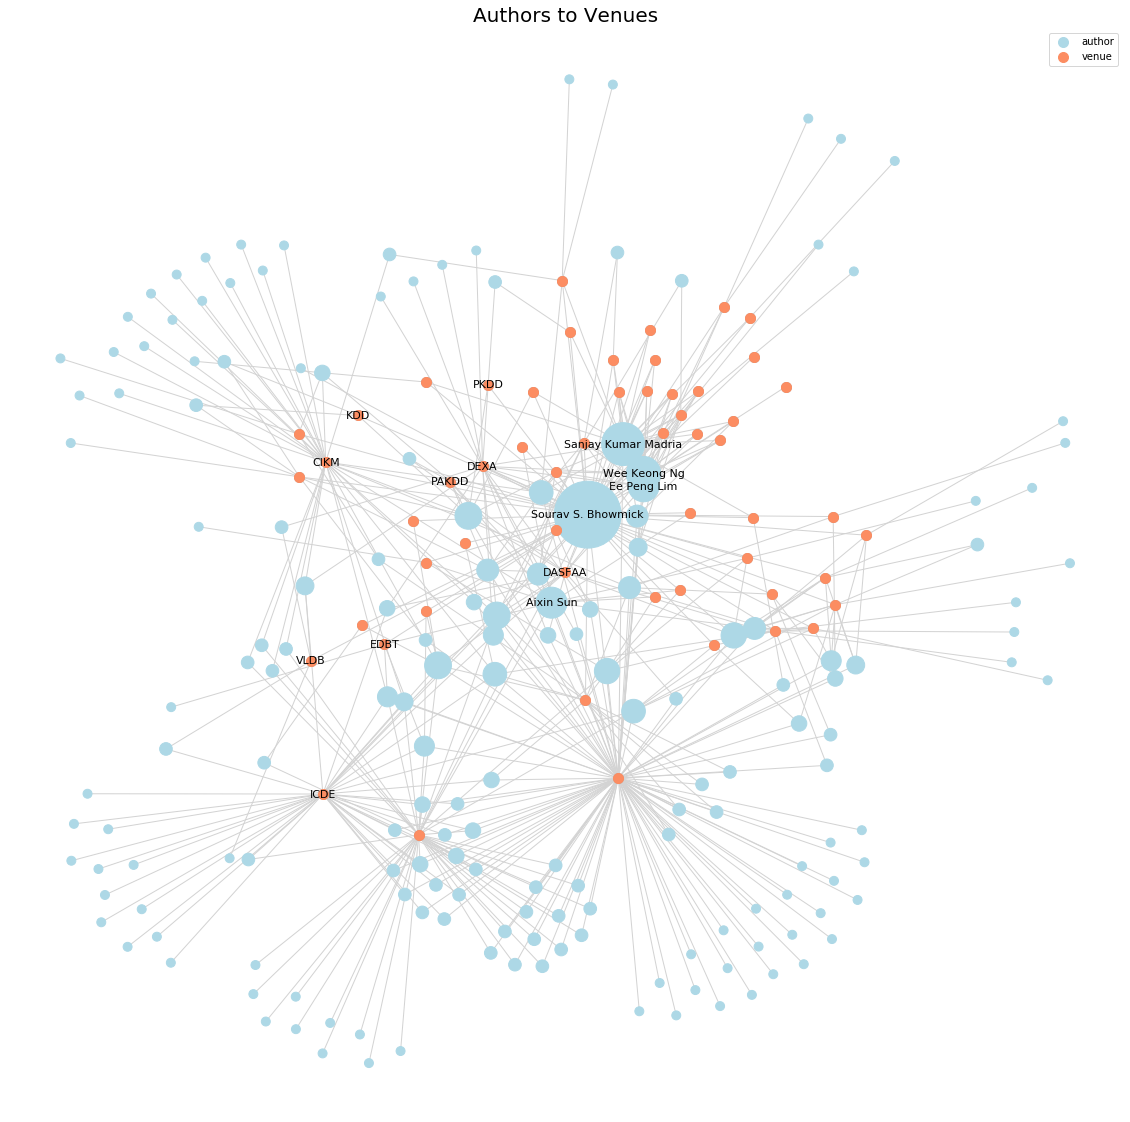

In [7]:
Graphtype = nx.Graph()

# 1. Create the graph
g = nx.from_pandas_edgelist(df, source='Author', target='Venue', create_using=Graphtype)

#layout = nx.spring_layout(g)

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

plt.figure(figsize=(20, 20))

# 3. Draw the relevant graph with nodes and links
# People small and grey

# Labels for authors ONLY
# People who are highly connected are a highlighted color

# Obtain degree of authors and multiply by 80 to get the circle size
# The respective size is proportional to the number of connections, degree
author_size = [g.degree(author) * 80 for author in authors]

# List of Author nodes are determined from the authors list and displayed nodes in lightblue
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=authors, 
                       node_size=author_size, # a list of sizes, based on degree centrality
                       node_color='lightblue')

# List of Venue nodes are determined from the venues list and displayed nodes in grey
nx.draw_networkx_nodes(g, layout, nodelist=venues, node_color='#AAAAAA', node_size=100) #cccccc

# Create a list of popular venues
popular_venues = [venue for venue in venues if g.degree(venue) > 0]
print("Popular venues :", popular_venues)
sorted_tier_venues = sorted(tier_venues)
print("Sorted Tier venues :", sorted_tier_venues)

displayed_venues = sorted(intersection(tier_venues, popular_venues))
print("Intersected venues :", displayed_venues)
venues_difference = set(tier_venues).symmetric_difference(displayed_venues)
print("Interested venues not present :", venues_difference)

# Create a list of popular authors
popular_authors = [author for author in authors if g.degree(author) > 10]
# Create nodes for popular authors mainly for legend labelling
nx.draw_networkx_nodes(g, layout, nodelist=popular_authors, node_color='lightblue', node_size=100, label='author') # lightblue

# List of popular venue nodes are determined from the popular_venues list and displayed nodes in orange
nx.draw_networkx_nodes(g, layout, nodelist=popular_venues, node_color='#fc8d62', node_size=100, label='venue') # orange

# Links/Edges are thin and displayed in lightgrey
nx.draw_networkx_edges(g, layout, width=1, edge_color="lightgrey") #cccccc

# Label the Venues
venue_labels = dict(zip(venues, venues))
displayed_venues_labels = dict(zip(displayed_venues, displayed_venues))

# Label the authors
authors_labels = dict(zip(authors, authors))
popular_authors_labels = dict(zip(popular_authors, popular_authors))

nx.draw_networkx_labels(g, layout, labels=popular_authors_labels, font_size=11) # author_labels
nx.draw_networkx_labels(g, layout, labels=displayed_venues_labels, font_size=11) # venue_labels
# font_family="sans-serif"

# 4. Turn off the axis
#plt.axis('off')
#nx.draw_networkx(g, layout)

plt.legend(loc='best')

plt.title("Authors to Venues", fontsize=20)
#save_fig("BhowmickSouravS_conf_graph")

# To remove node label coordinates and have matplotlib to show display
plt.show()

In [8]:
len(g.nodes) # Total no. of authors (175) and conferences (56)

231

In [9]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 231
Number of edges: 472
Average degree:   4.0866


In [10]:
degree_dict = (dict(g.degree))
degree_dict_values = degree_dict.values()
degree_dict_keys = degree_dict.keys()

max_dict_value = max(degree_dict_values)
max_dict_key = max(degree_dict, key=lambda k: degree_dict[k])

print("Degree Dictionary : ", degree_dict)
print("Max. degree : ", max_dict_value)
print("Max. degree key : ", max_dict_key)

Degree Dictionary :  {'Sourav S. Bhowmick': 56, 'NoBt': 92, 'Renchi Yang': 2, 'Jieming Shi': 1, 'Xiaokui Xiao': 4, 'Yin Yang': 1, 'Meng Wang 0015': 2, 'Hui Li 0005': 5, 'Jiangtao Cui': 3, 'Ping Liu': 1, 'Yijun Duan': 2, 'Adam Jatowt': 6, 'Masatoshi Yoshikawa': 2, 'Jin Yao Chin': 2, 'Xi Lin': 1, 'CIKM': 31, 'Yequan Wang': 1, 'Zengxiang Li': 1, 'Ricardo Campos 0001': 1, 'Antoine Doucet': 1, 'DASFAA (1)': 13, 'GRADES/NDA@SIGMOD/PODS': 1, 'Chaohui Wang': 1, 'ICDE': 40, 'Miao Xie': 2, 'Byron Choi': 9, 'Shuigeng Zhou': 5, 'Nathan Ng': 1, 'Peipei Yi': 2, 'Zhiwei Zhang': 1, 'Jianliang Xu': 3, 'Christina Lui': 1, 'SIGIR': 10, 'Kai Huang': 2, 'SIGMOD Conference': 43, 'Huey Eng Chua': 7, 'Zhewei Wei': 2, 'Jun Zhao': 2, 'Rong Hua Li': 2, 'Siyuan Liu': 2, 'Wanlu Zhang': 2, 'Shu Wang': 2, 'Wanyi Huang': 2, 'Shafiq R. Joty': 1, 'Yating Zhang': 3, 'WSDM': 4, 'Yuji Matsumoto 0001': 1, 'Encyclopedia of Big Data Technologies': 2, 'Mengting Xu': 1, 'Changsheng Sun': 1, 'Zhongyuan Jiang': 1, 'Human Interac

In [11]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
dmax = max(degree_sequence)

print("Sorted degree sequence :", degree_sequence)
print("Max. degree :", dmax)

Sorted degree sequence : [92, 56, 43, 40, 31, 23, 22, 17, 15, 13, 12, 12, 10, 10, 10, 9, 9, 9, 9, 8, 8, 8, 8, 8, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Max. degree : 92


In [12]:
degree_histogram = nx.degree_histogram(g)
print("Degree of an author :", g.degree('Sourav S. Bhowmick'))
print("No. of degree components (from 0) :", len(degree_histogram))

len(degree_sequence)

Degree of an author : 56
No. of degree components (from 0) : 93


231

In [13]:
print("List of index and values :")

for index, value in zip(range(len(degree_histogram)), degree_histogram):
    print(index, value, end='; ')

List of index and values :
0 0; 1 88; 2 57; 3 23; 4 19; 5 9; 6 7; 7 4; 8 5; 9 4; 10 3; 11 0; 12 2; 13 1; 14 0; 15 1; 16 0; 17 1; 18 0; 19 0; 20 0; 21 0; 22 1; 23 1; 24 0; 25 0; 26 0; 27 0; 28 0; 29 0; 30 0; 31 1; 32 0; 33 0; 34 0; 35 0; 36 0; 37 0; 38 0; 39 0; 40 1; 41 0; 42 0; 43 1; 44 0; 45 0; 46 0; 47 0; 48 0; 49 0; 50 0; 51 0; 52 0; 53 0; 54 0; 55 0; 56 1; 57 0; 58 0; 59 0; 60 0; 61 0; 62 0; 63 0; 64 0; 65 0; 66 0; 67 0; 68 0; 69 0; 70 0; 71 0; 72 0; 73 0; 74 0; 75 0; 76 0; 77 0; 78 0; 79 0; 80 0; 81 0; 82 0; 83 0; 84 0; 85 0; 86 0; 87 0; 88 0; 89 0; 90 0; 91 0; 92 1; 

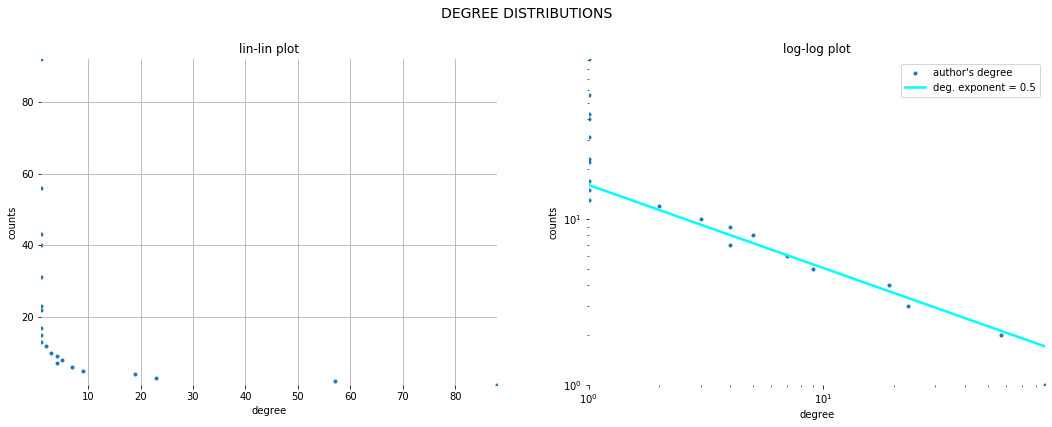

In [14]:
degree = degree_histogram
degree_counts = list(range(len(degree_histogram)))

coeff = 16
power = -0.5
x = np.linspace(1, 100, num=10)
y = coeff * x**power
legend_labels = ['author\'s degree', 'deg. exponent = ' + str(-1*power)]

# Plotting graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle('Degree Distributions'.upper(), y=1.0, fontsize=14)

# Plot lin-lin graph on the left column
plt.subplot(1, 2, 1)

plt.xlabel(r'degree')
plt.xlim(1, max(degree))
plt.ylabel(r'counts')
plt.ylim(1, max(degree_counts))

#plt.legend(loc='best') # 'upper left'
plt.scatter(degree, degree_counts, marker='.')
plt.title(r'lin-lin plot')
plt.grid(True)

# Plot log-log graph on the right column
plt.subplot(1, 2, 2)
plt.xlabel('degree')
plt.xscale('log')
plt.xlim(1, max(degree))
plt.ylabel('counts')
plt.yscale('log')
plt.ylim(1, max(degree_counts))

plt.scatter(degree, degree_counts, marker='.', label=legend_labels[0])
plt.title('log-log plot')

# '$f(x) = '+str(power)+'\cdot x + \log('+ str(coeff) + ')$'
plt.plot(x, y, linewidth=2.5, color='cyan', label=legend_labels[1])
plt.legend(loc='best')

# Change the order displayed in the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.show()

In [15]:
from collections import Counter
degree_dict = Counter(degree_dict)

degree_dict

Counter({'Sourav S. Bhowmick': 56,
         'NoBt': 92,
         'Renchi Yang': 2,
         'Jieming Shi': 1,
         'Xiaokui Xiao': 4,
         'Yin Yang': 1,
         'Meng Wang 0015': 2,
         'Hui Li 0005': 5,
         'Jiangtao Cui': 3,
         'Ping Liu': 1,
         'Yijun Duan': 2,
         'Adam Jatowt': 6,
         'Masatoshi Yoshikawa': 2,
         'Jin Yao Chin': 2,
         'Xi Lin': 1,
         'CIKM': 31,
         'Yequan Wang': 1,
         'Zengxiang Li': 1,
         'Ricardo Campos 0001': 1,
         'Antoine Doucet': 1,
         'DASFAA (1)': 13,
         'GRADES/NDA@SIGMOD/PODS': 1,
         'Chaohui Wang': 1,
         'ICDE': 40,
         'Miao Xie': 2,
         'Byron Choi': 9,
         'Shuigeng Zhou': 5,
         'Nathan Ng': 1,
         'Peipei Yi': 2,
         'Zhiwei Zhang': 1,
         'Jianliang Xu': 3,
         'Christina Lui': 1,
         'SIGIR': 10,
         'Kai Huang': 2,
         'SIGMOD Conference': 43,
         'Huey Eng Chua': 7,
         'Zh

In [16]:
# Verify total number of publications for author from python script
publications_list = [1, 3, 1, 1, 7, 1, 1, 18, 1, 1, 12, 7, 5, 18, 1, 3, 1, 4, 3, 2, 4, 1, 2, 1, 1, 1, 1, 1, 1,
                     1, 16, 1, 2, 1, 1, 1, 1, 3, 1, 2, 2, 1, 75, 1, 4, 1, 1, 6, 16, 1, 1, 1, 1, 1, 2, 3]
sum(publications_list)

251

## Observations from xml parsing script
- dblp refined by "Books and Theses, Conferences and Workshop Papers, Parts in Books or Collections, Editorship, Reference Works"
- 2 elements, b1 and b2 in "Books and Theses" are without booktitle making total counts of 176 instead of 178

# End of Program